You are given an m x n grid grid where:

    '.' is an empty cell.
    '#' is a wall.
    '@' is the starting point.
    Lowercase letters represent keys.
    Uppercase letters represent locks.

You start at the starting point and one move consists of walking one space in one of the four cardinal directions. You cannot walk outside the grid, or walk into a wall.

If you walk over a key, you can pick it up and you cannot walk over a lock unless you have its corresponding key.

For some 1 <= k <= 6, there is exactly one lowercase and one uppercase letter of the first k letters of the English alphabet in the grid. This means that there is exactly one key for each lock, and one lock for each key; and also that the letters used to represent the keys and locks were chosen in the same order as the English alphabet.

Return the lowest number of moves to acquire all keys. If it is impossible, return -1.

 

Example 1:

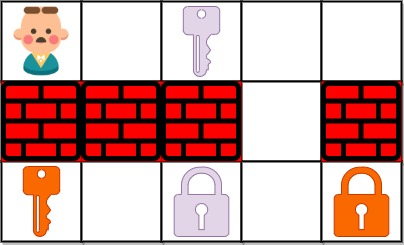

Input: grid = ["@.a..","###.#","b.A.B"]
Output: 8
Explanation: Note that the goal is to obtain all the keys not to open all the locks.

Example 2:

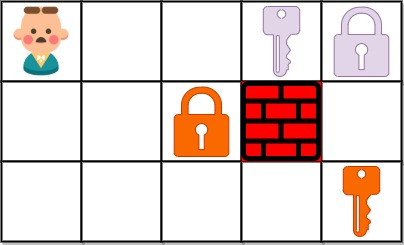

Input: grid = ["@..aA","..B#.","....b"]
Output: 6

Example 3:

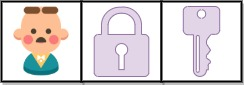

Input: grid = ["@Aa"]
Output: -1

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 30
    grid[i][j] is either an English letter, '.', '#', or '@'.
    The number of keys in the grid is in the range [1, 6].
    Each key in the grid is unique.
    Each key in the grid has a matching lock.



In [ ]:
class Solution:
    def shortestPathAllKeys(self, grid: List[str]) -> int:
        m, n = len(grid), len(grid[0])
        queue = collections.deque()
        
        # seen['key'] is only for BFS with key state equals 'keys'
        seen = collections.defaultdict(set)
        
        key_set, lock_set = set(), set()
        all_keys = 0
        start_r, start_c = -1, -1
        for i in range(m):
            for j in range(n):
                cell = grid[i][j]
                if cell in 'abcdef':
                    all_keys += (1 << (ord(cell) - ord('a')))
                    key_set.add(cell)
                if cell in 'ABCDEF':
                    lock_set.add(cell)
                if cell == "@":
                    start_r, start_c = i, j
        
        # [row, column, key_state, distance]
        queue.append((start_r, start_c, 0, 0))
        seen[0].add((start_r, start_c))
        
        while queue:
            cur_r, cur_c, keys, dist = queue.popleft()
            for dr, dc in ((0, 1), (1, 0), (-1, 0), (0, -1)):
                new_r, new_c = cur_r + dr, cur_c + dc
                
                # If this cell (new_r, new_c) is reachable.
                if 0 <= new_r < m and 0 <= new_c < n and grid[new_r][new_c] != '#':
                    cell = grid[new_r][new_c]
                    
                    # If it is a key we haven't picked up yet
                    if cell in key_set and not ((1 << (ord(cell) - ord('a'))) & keys):
                        new_keys = (keys | (1 << (ord(cell) - ord('a'))))

                        # If we collect all keys, return dist + 1. 
                        # Otherwise, just add this state to seen and queue.
                        if new_keys == all_keys:
                            return dist + 1
                        seen[new_keys].add((new_r, new_c))
                        queue.append((new_r, new_c, new_keys, dist + 1))
                      
                    # If it is a lock and we don't have its key, continue.
                    elif cell in lock_set and not (keys & (1 << (ord(cell) - ord('A')))):
                        continue
                        
                    # We can walk to this cell if we haven't been here before with the same key state.
                    elif (new_r, new_c) not in seen[keys]:
                        seen[keys].add((new_r, new_c))
                        queue.append((new_r, new_c, keys, dist + 1))
            
        return -1